<a href="https://colab.research.google.com/github/Thinh1135/Bai-tap-noi-com-dien/blob/main/Buoi_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz



In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=6dd5fab48d994a6f33d84488d68f8a24f95e5d5e83e645e80bc700d55b41e38a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x=np.arange(11)
infx=fuzz.trimf(x,[0,5,10])
x 

NameError: ignored

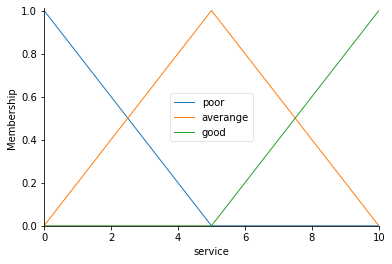

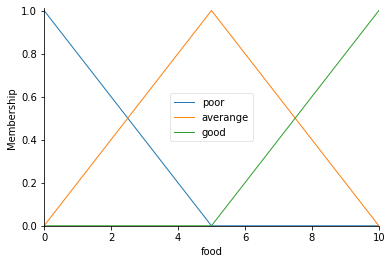

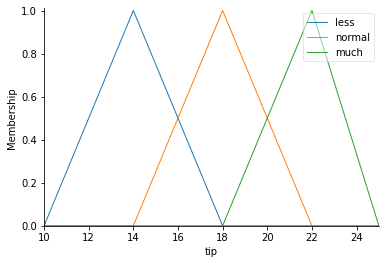

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,26,1),'tip') 
food['poor']=fuzz.trimf(food.universe, [0,0,5])
food['averange']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['averange']=fuzz.trimf(service.universe, [0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
service.view()
food.view()
tip.view()

17.516163602679207


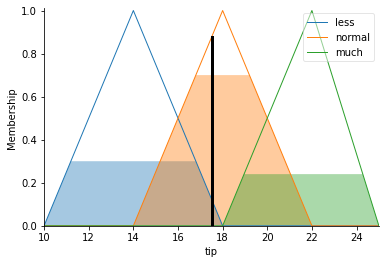

In [ ]:
rule1=ctrl.Rule(food['poor'] & service['poor'],tip ['less'])
rule2=ctrl.Rule(food['poor'] & service['averange'],tip ['less'])
rule3=ctrl.Rule(food['poor'] & service['good'],tip ['normal'])
rule4=ctrl.Rule(food['averange'] & service['poor'],tip ['less'])
rule5=ctrl.Rule(food['averange'] & service['averange'],tip ['normal'])
rule6=ctrl.Rule(food['averange'] & service['good'],tip ['much'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip ['normal'])
rule8=ctrl.Rule(food['good'] & service['averange'],tip ['much'])
rule9=ctrl.Rule(food['good'] & service['good'],tip ['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.2
tipping.input['service']=3.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


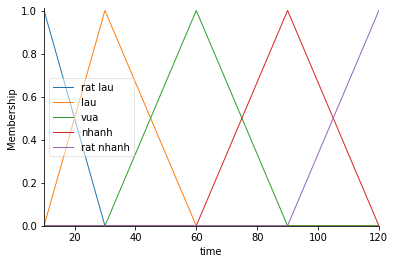

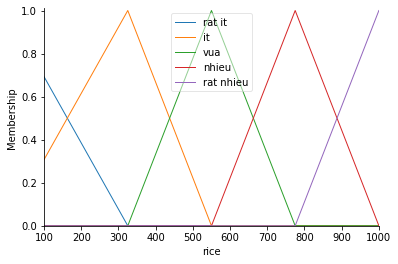

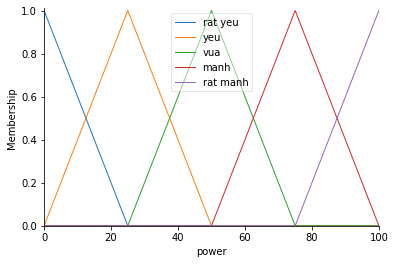

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,121,10),'time')
rice=ctrl.Antecedent(np.arange(100,1001,225),'rice')
power=ctrl.Consequent(np.arange(0,101,25),'power') 
time['rat lau']=fuzz.trimf(time.universe,[10,10,30])
time['lau']=fuzz.trimf(time.universe,[10,30,60])
time['vua']=fuzz.trimf(time.universe,[30,60,90])
time['nhanh']=fuzz.trimf(time.universe,[60,90,120])
time['rat nhanh']=fuzz.trimf(time.universe,[90,120,120])
rice['rat it']=fuzz.trimf(rice.universe,[0,0,325])
rice['it']=fuzz.trimf(rice.universe, [0,325,550])
rice['vua']=fuzz.trimf(rice.universe,[325,550,775])
rice['nhieu']=fuzz.trimf(rice.universe, [550,775,1000])
rice['rat nhieu']=fuzz.trimf(rice.universe, [775,1000,1000])
power['rat yeu']=fuzz.trimf(power.universe,[0,0,25])
power['yeu']=fuzz.trimf(power.universe,[0,25,50])
power['vua']=fuzz.trimf(power.universe,[25,50,75])
power['manh']=fuzz.trimf(power.universe,[50,75,100])
power['rat manh']=fuzz.trimf(power.universe,[75,100,100])
time.view()
rice.view()
power.view()

43.28117864782368


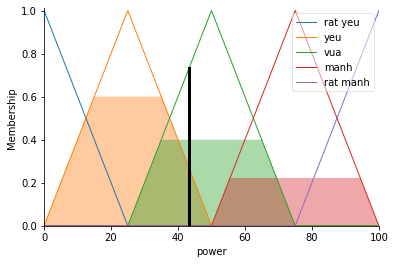

In [28]:
rule1=ctrl.Rule(time['rat lau'] & rice['rat it'],power ['rat yeu'])
rule2=ctrl.Rule(time['rat lau'] & rice['it'],power ['rat yeu'])
rule3=ctrl.Rule(time['rat lau'] & rice['vua'],power ['yeu'])
rule4=ctrl.Rule(time['rat lau'] & rice['nhieu'],power ['yeu'])
rule5=ctrl.Rule(time['rat lau'] & rice['rat nhieu'],power ['vua'])
rule6=ctrl.Rule(time['lau'] & rice['rat it'],power ['rat yeu'])
rule7=ctrl.Rule(time['lau'] & rice['it'],power ['yeu'])
rule8=ctrl.Rule(time['lau'] & rice['vua'],power ['yeu'])
rule9=ctrl.Rule(time['lau'] & rice['nhieu'],power ['vua'])
rule10=ctrl.Rule(time['lau'] & rice['rat nhieu'],power ['manh'])
rule11=ctrl.Rule(time['vua'] & rice['rat it'],power ['yeu'])
rule12=ctrl.Rule(time['vua'] & rice['it'],power ['yeu'])
rule13=ctrl.Rule(time['vua'] & rice['vua'],power ['vua'])
rule14=ctrl.Rule(time['vua'] & rice['nhieu'],power ['manh'])
rule15=ctrl.Rule(time['vua'] & rice['rat nhieu'],power ['manh'])
rule16=ctrl.Rule(time['nhanh'] & rice['rat it'],power ['yeu'])
rule17=ctrl.Rule(time['nhanh'] & rice['it'],power ['vua'])
rule18=ctrl.Rule(time['nhanh'] & rice['vua'],power ['manh'])
rule19=ctrl.Rule(time['nhanh'] & rice['nhieu'],power ['manh'])
rule20=ctrl.Rule(time['nhanh'] & rice['rat nhieu'],power ['rat manh'])
rule21=ctrl.Rule(time['rat nhanh'] & rice['rat it'],power ['vua'])
rule22=ctrl.Rule(time['rat nhanh'] & rice['it'],power ['manh'])
rule23=ctrl.Rule(time['rat nhanh'] & rice['vua'],power ['manh'])
rule24=ctrl.Rule(time['rat nhanh'] & rice['nhieu'],power ['rat manh'])
rule25=ctrl.Rule(time['rat nhanh'] & rice['rat nhieu'],power ['rat manh'])

Power_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Power=ctrl.ControlSystemSimulation(Power_ctrl)
Power.input['time']=42
Power.input['rice']=600
Power.compute()
print(Power.output['power'])
power.view(sim=Power)